In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Desciptive Statistic


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Read csv file
df = pd.read_csv("/content/drive/MyDrive/stat_project/analysis/trainingset/FPT_stock_data.csv")
# Convert date field as datetime type
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Seperate data by year
df_2020 = df[df['date'].dt.year == 2020].copy()
df_2021 = df[df['date'].dt.year == 2021].copy()
df_2022 = df[df['date'].dt.year == 2022].copy()
df_2023 = df[df['date'].dt.year == 2023].copy()
df_2024 = df[df['date'].dt.year == 2024].copy()

# Use data in 2023 and 2024
df_23_24 = df[(df['date'].dt.year == 2023) | (df['date'].dt.year == 2024)].copy()

# Print descriptive statistic
print(df_23_24['close_price'].describe())

count    468.000000
mean     103.524145
std       21.660236
min       74.600000
25%       83.500000
50%       95.900000
75%      128.850000
max      146.500000
Name: close_price, dtype: float64


Text(0, 0.5, 'Frequency')

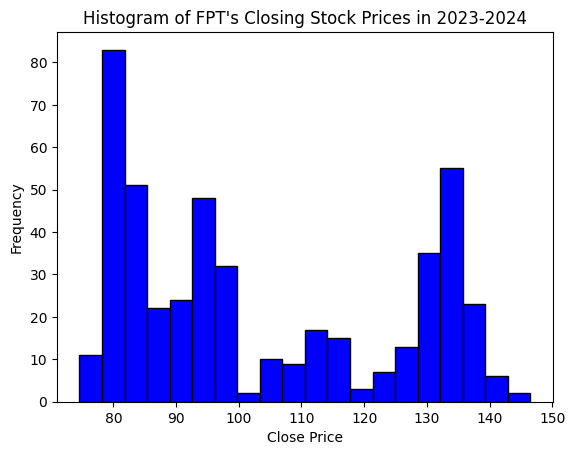

In [3]:
# Print histogram of close price
plt.hist(df_23_24['close_price'], bins=20, color='b', edgecolor='black')
plt.title('Histogram of FPT\'s Closing Stock Prices in 2023-2024')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

Text(0.5, 0, 'Close Price')

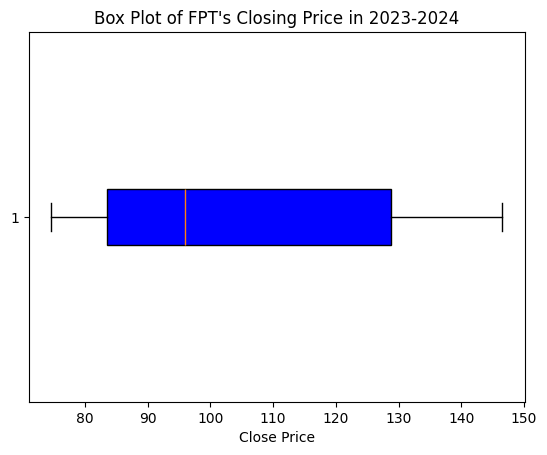

In [4]:
# Print Box Plot
plt.boxplot(df_23_24['close_price'], vert=False, patch_artist=True, boxprops=dict(facecolor='b', color='black'))
plt.title("Box Plot of FPT\'s Closing Price in 2023-2024")
plt.xlabel("Close Price")

In [ ]:
#  Identify Stock Trends


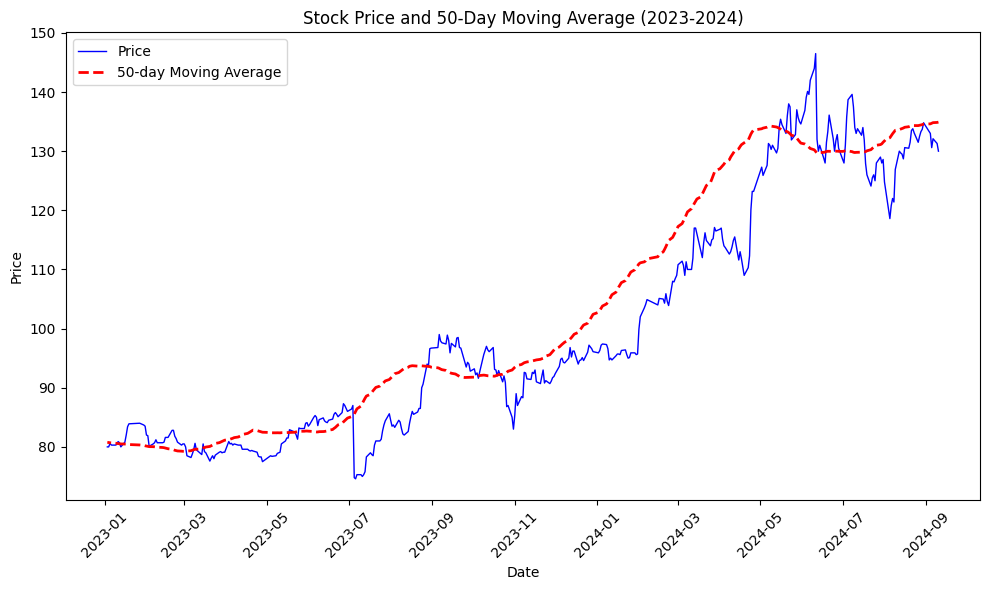

In [5]:
# Calculate the Simple Moving Average (SMA) for a 50-day window
df_23_24['SMA_50'] = df_23_24['close_price'].rolling(window=50).mean()  # Calculate SMA with a 50-day window

# Drop any NaN values in the SMA column to avoid errors when plotting
df_23_24 = df_23_24.dropna(subset=['SMA_50'])

# Plot the stock price and the 50-day moving average
plt.figure(figsize=(10,6))  # Set the figure size for the plot
plt.plot(df_23_24['date'], df_23_24['close_price'], label='Price', color='blue', linewidth=1)  # Plot the stock price
plt.plot(df_23_24['date'], df_23_24['SMA_50'], label='50-day Moving Average', color='red', linestyle='--', linewidth=2)  # Plot the 50-day SMA

# Add title, labels, and legend to the plot
plt.title('Stock Price and 50-Day Moving Average (2023-2024)')  # Title of the plot
plt.xlabel('Date')  # Label for the x-axis
plt.ylabel('Price')  # Label for the y-axis
plt.legend()  # Display the legend

# Show the plot with adjusted layout
plt.xticks(rotation=45)  # Rotate the x-axis labels (dates) for better readability
plt.tight_layout()  # Adjust the layout to avoid overlap
plt.show()  # Display the plot


In [ ]:
# Stationarity Check


ADF Statistic: -1.4122756127243787
p-value: 0.5763770921491776
Critical Values: {'1%': -3.4464005219454155, '5%': -2.868615280538588, '10%': -2.570538905413444}


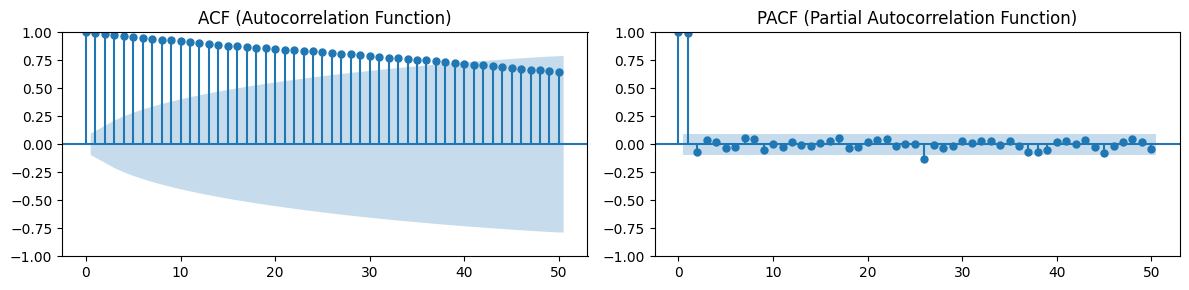

In [6]:
# Perform the Augmented Dickey-Fuller (ADF) test to check for stationarity
result = adfuller(df_23_24['close_price'])
print('ADF Statistic:', result[0])  # Print the ADF statistic
print('p-value:', result[1])        # Print the p-value
print('Critical Values:', result[4])  # Print the critical values for the test

# Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 3))

# Plot ACF for the stock price with 50 lags
plt.subplot(121)
plot_acf(df_23_24['close_price'], lags=50, ax=plt.gca())
plt.title('ACF (Autocorrelation Function)')  # Add title for ACF plot

# Plot PACF for the stock price with 50 lags
plt.subplot(122)
plot_pacf(df_23_24['close_price'], lags=50, ax=plt.gca())
plt.title('PACF (Partial Autocorrelation Function)')  # Add title for PACF plot

# Display the plots
plt.tight_layout()  # Adjust the layout of the plots
plt.show()          # Show the plots
